In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [2]:
X,y=load_diabetes(return_X_y=True)

In [3]:
#Sklearn.datasets is used to load prebuilt dataset

In [4]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [6]:
X.shape

(442, 10)

In [7]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
y.shape

(442,)

## Multiple Linear Regression using Sklearn

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [12]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(X_train,Y_train)

LinearRegression()

In [16]:
y_pred=lr.predict(X_test)

In [17]:
from sklearn.metrics import r2_score

In [19]:
r2_score(Y_test,y_pred)

0.4161792211496943

In [22]:
lr.coef_
# Printing coefficinet for metrics

array([  -1.13744712, -212.8867836 ,  540.45536994,  345.20621542,
       -938.23814645,  516.62060367,  172.85885498,  267.87535242,
        732.63230159,   70.07849485])

In [24]:
lr.intercept_
#Printing Intercept values such that b value

153.13441535285003

# Linear Regression From Scratch

In [38]:
class MeraLR:
    def __init__(self):
        self.coef_=None
        self.intercept_=None
        
    def fit(self,X_train,Y_train):
        X_train=np.insert(X_train,0,1,axis=1)
        #np.insert is used to add new column intrain metrics which is of 1
        
        #Creating a coefficient
        #np.linalg.ins is used to take inversion of metrix
        
        betas=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(Y_train)
        self.intercept_=betas[0]
        self.coef_=betas[1:]
        
    def predict(self,X_test):
        y_predict=np.dot(X_test,self.coef_)+self.intercept_
        return y_predict

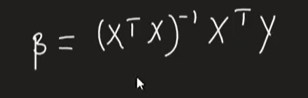

### Above You can see the formula for trainig the metrics , where X=X_train and Y=Y_train

### for making predictions we are using the same formula as before which is Y=mX+b

In [39]:
reg=MeraLR()

In [40]:
reg.fit(X_train,Y_train) #trainig the Model

In [41]:
Y_pred=reg.predict(X_test) #making Predictions

In [42]:
r2_score(Y_test,Y_pred)

0.4161792211496933

In [43]:
reg.coef_

array([  -1.13744712, -212.8867836 ,  540.45536994,  345.20621542,
       -938.23814645,  516.62060367,  172.85885498,  267.87535242,
        732.63230159,   70.07849485])

In [44]:
reg.intercept_

153.13441535285006

## From the above you can see that accuarcy of Model We build is same as the Accuracy of model we use in Sklearn , also the coefficient & intercept value is also same for both sklearn and the class we derived from Scratch. Hence , model we build is Working as efficiently as Sklearn's Model

# Conclude